In [1]:
import matplotlib as mpl

fsize = 12
mpl.rcParams['legend.fontsize'] = fsize
mpl.rcParams["figure.figsize"] = (6,5)
mpl.rcParams['axes.labelsize'] = fsize
mpl.rcParams['xtick.labelsize'] = fsize
mpl.rcParams['ytick.labelsize'] = fsize
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams.update({'font.size': fsize})

import matplotlib.pyplot as plt
import numpy as np

from scipy.special import laguerre
from scipy.special import roots_laguerre

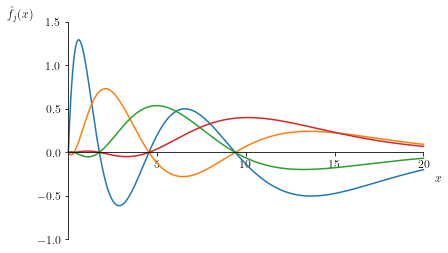

In [2]:
x = np.linspace(0, 20, 1000)

N = 4
h = 1

#List of all Laguerre polynomial zeroes
Laguerre_zeroes = roots_laguerre(N)[0]

def Lagrange_Laguerre(x, x_j, j, N, n=1):
    return (-1)**j * np.sqrt(x_j) * (x/x_j)**n * (laguerre(N)(x) / (x - x_j) * np.exp(-x/2))

f_N = [Lagrange_Laguerre(x, Laguerre_zeroes[i-1], i, N, h)/np.sqrt(h) for i in range(1,N+1)]

# print(roots_laguerre(4)[0])
fig, ax = plt.subplots(1,1, figsize=(7,4))

for i in range(0, N):
    ax.plot(x, f_N[i])

ax.set_ylim(-1,1.5)
ax.set_ylabel(r'$\hat{f}_j(x)$', loc='top', rotation=0)
ax.set_xlabel(r'$x$', loc='right')

x_major = [5, 10, 15, 20]
ax.set_xticks(x_major)

# set the y-spine
ax.spines['left'].set_position('zero') # set left spine to y=0
ax.spines['right'].set_color('none') # turn off the right spine/ticks
ax.yaxis.tick_left()

# set the x-spine
ax.spines['bottom'].set_position('zero') # set bottom spine to x=0
ax.spines['top'].set_color('none') # turn off the top spine/ticks
ax.xaxis.tick_bottom()
ax.spines['bottom'].set_bounds((0, x_major[-1]))

plt.savefig('f_hat.pdf', bbox_inches='tight')

469.45915447919396
-2.2020018478033703


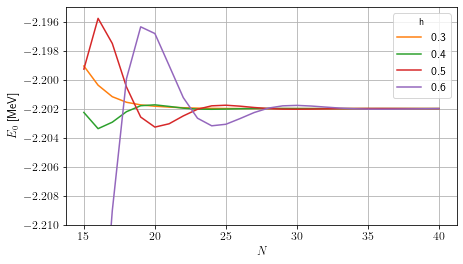

In [3]:
#construcción de la matriz hamiltoniana

m_p_c2 = 938.27208816 #MeV
m_n_c2 = 939.56542052 #MeV

mu_c2 = m_p_c2*m_n_c2/(m_p_c2+m_n_c2)

print(mu_c2)

hbar_c = 197.3269804 #MeV fm

hb2_2mu = (hbar_c**2)/(2*mu_c2)

def H_ij(i,j,h,N):
    Laguerre_zeroes = roots_laguerre(N)[0]
    x_i = Laguerre_zeroes[i-1]

    T_ij = 0
    V_ij = 0

    if i==j:
        T_ij = -hbar_c**2*(x_i**2-(4*N+2)*x_i-4)/(2*mu_c2*12*x_i**2) #3.76 Baye 2015
        V_ij = 200*np.exp(-1.487*(x_i*h)**2)-178*np.exp(-0.639*(x_i*h)**2)
    else:
        x_j = Laguerre_zeroes[j-1]
        T_ij = hbar_c**2*((-1)**(i-j))*(x_i+x_j)/(2*mu_c2*((x_i*x_j)**0.5)*(x_i-x_j)**2) #3.75 Baye 2015
    
    return T_ij/(h**2)+V_ij

fig1, ax1 = plt.subplots(1,1, figsize=(7,4))

#list of matplotlib colors
color_list = list(mpl.colors.TABLEAU_COLORS.keys())

h_values = np.arange(0.3, 0.7, 0.1)
N_values = list()
N_min = 15

suma = 0
for h_id, h in enumerate(h_values):
    eig_values = list()
    eig_val_err = 100
    N = N_min
    N_id = 0
    
    #while eig_val_err>0.0001:
    while N<41:
        H_matrix = np.zeros((N,N))

        for i in range(1, N+1):
            H_matrix[i-1] = np.array([H_ij(i, j, h, N) for j in range(1, N+1)])

        eig_values.append(min(np.linalg.eig(H_matrix)[0]))

        if N_id>0:
            eig_val_err = np.abs((eig_values[-1]-eig_values[-2])/eig_values[-1])
        
        N += 1
        N_id += 1

    N -= 1
    N_values.append(N)
    ax1.plot(np.arange(N_min, N+1), eig_values, label=np.round(h,1), color=color_list[h_id+1])
    suma += eig_values[-1]
    #ax1.axvline(x=N, color=color_list[h_id+1])

print(suma/4)

ax1.set_ylim(-2.21,-2.195)
ax1.set_ylabel(r'$E_0$ [MeV]')
ax1.set_xlabel(r'$N$')

x_major = np.arange(N_min, max(N_values)+5,5)
ax1.set_xticks(x_major)

ax1.legend(title="h")
ax1.grid()

plt.savefig('E_base_h_N_2.pdf', bbox_inches='tight')

[[ 1.67144650e+05 -3.06898768e+04  5.55135189e+03 -1.96260828e+03
   9.19169933e+02 -5.03906477e+02  3.05747299e+02 -1.99169968e+02
   1.36745344e+02 -9.77622046e+01  7.21696008e+01 -5.46794911e+01
   4.23257837e+01 -3.33558425e+01  2.66882728e+01 -2.16310129e+01
   1.77270798e+01 -1.46664137e+01  1.22335740e+01 -1.02756728e+01
   8.68214136e+00 -7.37162664e+00  6.28330356e+00 -5.37098047e+00
   4.59899994e+00 -3.93928807e+00  3.36908282e+00 -2.86886275e+00
   2.41947815e+00 -1.99359822e+00]
 [-3.06898768e+04  2.11860947e+04 -7.63385333e+03  1.50507968e+03
  -5.63773667e+02  2.76293061e+02 -1.57135281e+02  9.82624273e+01
  -6.56354842e+01  4.60232062e+01 -3.34962385e+01  2.51082568e+01
  -1.92753477e+01  1.50914675e+01 -1.20115779e+01  9.69384888e+00
  -7.91622795e+00  6.53006690e+00 -5.43322875e+00  4.55391112e+00
  -3.84060036e+00  3.25565429e+00 -2.77109676e+00  2.36579382e+00
  -2.02350843e+00  1.73151320e+00 -1.47953427e+00  1.25880370e+00
  -1.06077510e+00  8.73353850e-01]
 [ 5.5

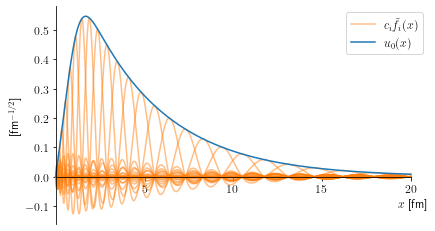

In [15]:
#dibujar funcion radial

h = 0.3
N= 30

H_matrix = np.zeros((N,N))

for i in range(1, N+1):
    H_matrix[i-1] = np.array([H_ij(i, j, h, N) for j in range(1, N+1)])

print(H_matrix)

eig_values, eigen_vectors = np.linalg.eig(H_matrix)
eigen_vectors = eigen_vectors.T

index = np.argmin(eig_values)
print(eig_values[index])
print(index)
#np.argsort(eig_values)[0]
V_0 = eigen_vectors[index]

print(eig_values[index]*V_0)
print(H_matrix.dot(V_0))

Laguerre_zeroes = roots_laguerre(N)[0]

x = np.linspace(0, 20, 1000)
f_N_scaled = [Lagrange_Laguerre(x/h, Laguerre_zeroes[i-1], i, N, h)/np.sqrt(h) for i in range(1,N+1)]

fig, ax = plt.subplots(1,1, figsize=(7,4))

u_0 = [0]*len(x)
for i in range(0, N):
    if i==0:
        ax.plot(x, eigen_vectors[index][i]*f_N_scaled[i], color=color_list[1], alpha=0.5, label=r'$c_i\tilde{f}_i(x)$')
    else:
        ax.plot(x, eigen_vectors[index][i]*f_N_scaled[i], color=color_list[1], alpha=0.5)

    u_0 += eigen_vectors[index][i]*f_N_scaled[i]

print(len(u_0), len(eigen_vectors), len(f_N_scaled))

ax.plot(x, u_0, color=color_list[0], label=r"$u_0(x)$")

#ax.set_ylim(-1,1.5)
ax.set_ylabel(r'[fm$^{-1/2}$]')
ax.set_xlabel(r'$x$ [fm]', loc='right')

x_major = [5, 10, 15, 20]
ax.set_xticks(x_major)

# set the y-spine
ax.spines['left'].set_position('zero') # set left spine to y=0
ax.spines['right'].set_color('none') # turn off the right spine/ticks
ax.yaxis.tick_left()

# set the x-spine
ax.spines['bottom'].set_position('zero') # set bottom spine to x=0
ax.spines['top'].set_color('none') # turn off the top spine/ticks
ax.xaxis.tick_bottom()
ax.spines['bottom'].set_bounds((0, x_major[-1]))

ax.legend()

plt.savefig('u_0.pdf', bbox_inches='tight')

print(eigen_vectors[0])